In [1]:
import numpy as np
import pandas as pd
import glob
import os
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# Haltere loading

In [13]:
datadir = r"../Submission 2/Data to be uploaded to Dryad/HaltereLoading_Figure5/"
files = glob.glob(datadir + "singlewingbeat*.mat")
files

['../Submission 2/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly1.mat',
 '../Submission 2/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly2.mat',
 '../Submission 2/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly3.mat',
 '../Submission 2/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly4.mat',
 '../Submission 2/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly5.mat',
 '../Submission 2/Data to be uploaded to Dryad/HaltereLoading_Figure5\\singlewingbeat_fly8.mat']

In [14]:
del_intact = []
del_loaded = []
flyid = []

for f in files:
    data = loadmat(f)
    
    idnum = os.path.basename(f)[-5:-4]
    
    wing = data['loadedhaltere3'].T[0]
    loadedhaltere = data['loadedhaltere3'].T[1]
    intacthaltere = data['loadedhaltere3'].T[2]
    
    diff_intact = np.mean(wing) - np.mean(intacthaltere)
    diff_loaded = np.mean(wing) - np.mean(loadedhaltere)
    
    del_intact.append(diff_intact)
    del_loaded.append(diff_loaded)
    flyid.append(idnum)

In [15]:
df = pd.DataFrame({'intact': del_intact, 'loaded': del_loaded, 'flyid': flyid})

### t test - null hypothesis: the difference in wing - intact haltere freq is the same as wing - loaded haltere freq

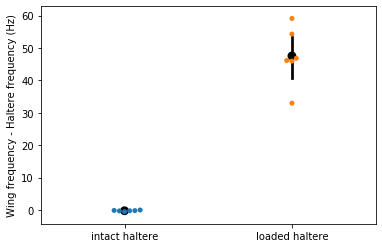

In [16]:
subset = df.iloc[:,0:2]
subset.columns = ['intact haltere', 'loaded haltere']
sns.pointplot(data = subset, linestyles = 'None', color = 'k')
ax = sns.swarmplot(data = subset)
ax.set(ylabel = 'Wing frequency - Haltere frequency (Hz)')
plt.savefig(r"./SampleSizeAndStats/HaltereLoading.png")

In [17]:
stats.ttest_rel(df.intact, df.loaded)

Ttest_relResult(statistic=-13.039170025850558, pvalue=4.7322546460043054e-05)

In [18]:
# get my estimated sample size
intact = (np.mean(df.intact), np.std(df.intact))
loaded = (np.mean(df.loaded), np.std(df.loaded))

#### Simulate 10000 datasets based on our data mean and std and do power analysis

In [19]:
def simulate_test_paired(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt,  mean_trt,  sd_trt):
    '''
    Simulate data from two normal distributions and calculate p-value
    from paired t-test
    
        Args: 
        sample sizes, means, and sd's from control and trt groups

        Returns:
        p-value from simulated data
    '''
    simdata_ctrl = np.random.normal(loc = mean_ctrl, scale = sd_ctrl, size = samp_size_ctrl)
    simdata_trt = np.random.normal(loc = mean_trt, scale = sd_trt, size = samp_size_trt)
    _, p = stats.ttest_rel(simdata_ctrl, simdata_trt)
    return(p)

In [20]:
samp_size_ctrl = 4
mean_ctrl, sd_ctrl = intact

samp_size_trt = 4
mean_trt, sd_trt = loaded

# simulate 10000 samples
simulated_pvals = [simulate_test_paired(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                                 samp_size_trt, mean_trt, sd_trt) for ii in range(1000)]

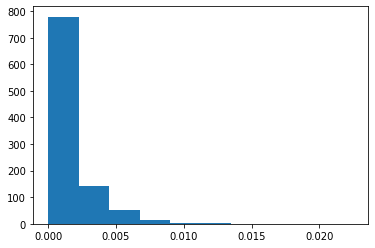

Power for sample size ( 4 4 ) =  1.0


In [21]:
plt.hist(simulated_pvals)
plt.show()

# report power
print("Power for sample size (", samp_size_ctrl, samp_size_trt, ") = ",np.mean(np.array(simulated_pvals) < 0.05))

In [22]:
mean_ctrl, sd_ctrl = intact
mean_trt, sd_trt = loaded

power = []
for ss in range(2,10):
    samp_size_ctrl = ss
    samp_size_trt = ss
    # simulate 10000 samples
    simulated_pvals = [simulate_test_paired(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                                 samp_size_trt, mean_trt, sd_trt) for ii in range(1000)]
    p = np.mean(np.array(simulated_pvals) < 0.05)
    power.append(p)

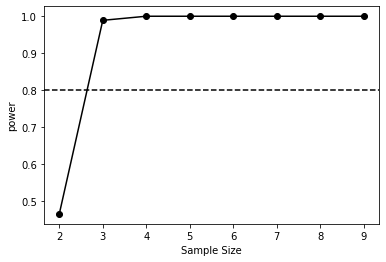

In [23]:
plt.plot(range(2,10), power, marker = 'o', color = 'k')
plt.axhline(y = 0.8, linestyle = '--', color = 'k')
plt.ylabel("power")
plt.xlabel('Sample Size')
plt.savefig(r"./SampleSizeAndStats\HaltereLoading-PowerAnalysis.png")

# Wing Coupling 

### get the treatment variables together

#### treatment - Slit Sc

In [24]:
direc = r"../Submission 2/Data to be uploaded to Dryad/AsymWingsSlitSc_Figure2/"
files = glob.glob(direc + '*/*fft.mat', recursive = True)
files

['../Submission 2/Data to be uploaded to Dryad/AsymWingsSlitSc_Figure2\\fly1\\fly1_fft.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsSlitSc_Figure2\\fly2\\fly2_fft.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsSlitSc_Figure2\\fly7\\fly7_fft.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsSlitSc_Figure2\\fly8\\fly8_fft.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsSlitSc_Figure2\\fly9\\fly9_fft.mat']

In [25]:
Delta_wingFreq = []
treatment = []

for f in files:
    data = loadmat(f)
    select = os.path.basename(f)[:-4]
    data[select].T
    
    # get the frequency of left and right wing where we see the largest difference
    left_wing = data[select].T[0]
    right_wing = data[select].T[2]
    
    delta = np.max(abs(left_wing - right_wing))
    trt = "Slit Scutellum"
    
    Delta_wingFreq.append(delta)
    treatment = trt

In [26]:
temp_df1 = pd.DataFrame({'Delta_wingFreq': Delta_wingFreq, 'treatment': treatment})
temp_df1

,Delta_wingFreq,treatment
0,40.00,Slit Scutellum
1,70.63,Slit Scutellum
2,49.98,Slit Scutellum
3,62.47,Slit Scutellum
4,84.20,Slit Scutellum


#### control - intact thorax data

In [27]:
direc = r"../Submission 2/Data to be uploaded to Dryad/AsymWingsIntactSc_Figure2/"
files = glob.glob(direc + 'singlewingbeat_fly*.mat')
files

['../Submission 2/Data to be uploaded to Dryad/AsymWingsIntactSc_Figure2\\singlewingbeat_fly1.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsIntactSc_Figure2\\singlewingbeat_fly2.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsIntactSc_Figure2\\singlewingbeat_fly3.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsIntactSc_Figure2\\singlewingbeat_fly5.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsIntactSc_Figure2\\singlewingbeat_fly6.mat',
 '../Submission 2/Data to be uploaded to Dryad/AsymWingsIntactSc_Figure2\\singlewingbeat_fly7.mat']

In [28]:
Delta_wingFreq = []
treatment = []

for f in files:
    data = loadmat(f)
    
    # select the largest wingcut
    treatments = [int(keys[7]) for keys in data.keys() if 'cutwing' in keys]
    extreme_treatment = str(np.max(treatments))
    select = [key for key in list(data.keys()) if extreme_treatment in key]

    left_wing = data[select[0]].T[0]
    right_wing = data[select[0]].T[1]
    delta = abs(np.nanmean(left_wing) - np.nanmean(right_wing))
    trt = "Intact Thorax (Control)"
    
    Delta_wingFreq.append(delta)
    treatment = trt

In [29]:
temp_df2 = pd.DataFrame({'Delta_wingFreq': Delta_wingFreq, 'treatment': treatment})

In [30]:
Wing_coordination_df = []
Wing_coordination_df = pd.concat([temp_df1, temp_df2], ignore_index = True )
Wing_coordination_df.Delta_wingFreq = Wing_coordination_df.Delta_wingFreq
Wing_coordination_df

,Delta_wingFreq,treatment
0,40.000000,Slit Scutellum
1,70.630000,Slit Scutellum
2,49.980000,Slit Scutellum
3,62.470000,Slit Scutellum
4,84.200000,Slit Scutellum
5,0.578533,Intact Thorax (Control)
6,1.042189,Intact Thorax (Control)
7,0.104807,Intact Thorax (Control)
8,0.049020,Intact Thorax (Control)
9,0.000000,Intact Thorax (Control)


### plot them and get the power analysis

### t test - null hypothesis: the difference in left- right freq for intact thorax and slit Sc is the same

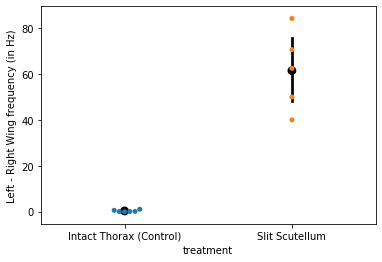

In [31]:
sns.pointplot(x = 'treatment', y = 'Delta_wingFreq', data = Wing_coordination_df, 
             estimator = np.mean, color = 'k', linestyles = 'None',
             order = ['Intact Thorax (Control)', 'Slit Scutellum'])
ax = sns.swarmplot(x = 'treatment', y = 'Delta_wingFreq', data = Wing_coordination_df,
                  order = ['Intact Thorax (Control)', 'Slit Scutellum'])
ax.set(ylabel = 'Left - Right Wing frequency (in Hz)')

plt.savefig(r"./SampleSizeAndStats/SlitSc.png")

In [32]:
ctr = Wing_coordination_df['Delta_wingFreq'][Wing_coordination_df.treatment == 'Intact Thorax (Control)'].values
trt = Wing_coordination_df['Delta_wingFreq'][Wing_coordination_df.treatment == 'Slit Scutellum'].values
stats.ttest_ind(ctr, trt, equal_var=False)

Ttest_indResult(statistic=-7.910562876825567, pvalue=0.0013760916235578582)

In [33]:
# calculate mean and sd of original data
result = Wing_coordination_df.groupby(['treatment'], as_index=True).agg(
                      {'Delta_wingFreq':['mean','std', "count"]})
result

Delta_wingFreq                 
                                  mean        std count
treatment                                              
Intact Thorax (Control)       0.305679   0.418844     6
Slit Scutellum               61.456000  17.281048     5

#### Simulate 10000 datasets based on our data mean and std and do power analysis

In [34]:
def simulate_test(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt,  mean_trt,  sd_trt):
    '''
    Simulate data from two normal distributions and calculate p-value
    from paired t-test
    
        Args: 
        sample sizes, means, and sd's from control and trt groups

        Returns:
        p-value from simulated data
    '''
    simdata_ctrl = np.random.normal(loc = mean_ctrl, scale = sd_ctrl, size = samp_size_ctrl)
    simdata_trt = np.random.normal(loc = mean_trt, scale = sd_trt, size = samp_size_trt)
    _, p = stats.ttest_ind(simdata_ctrl, simdata_trt, equal_var=False)
    return(p)                           

In [35]:
mean_ctrl = result.loc['Intact Thorax (Control)', 'Delta_wingFreq']['mean']
sd_ctrl = result.loc['Intact Thorax (Control)', 'Delta_wingFreq']['std']

mean_trt = result.loc['Slit Scutellum', 'Delta_wingFreq']['mean']
sd_trt = result.loc['Slit Scutellum', 'Delta_wingFreq']['std']

power = []
for ss in range(2,9):
    samp_size_ctrl = ss
    samp_size_trt = ss
    # simulate 10000 samples
    simulated_pvals = [simulate_test(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                                 samp_size_trt, mean_trt, sd_trt) for ii in range(1000)]
    p = np.mean(np.array(simulated_pvals) < 0.05)
    power.append(p)

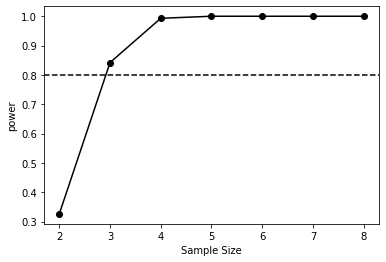

In [36]:
plt.plot(range(2,9), power, marker = 'o', color = 'k')
plt.axhline(y = 0.8, linestyle = '--', color = 'k')

plt.ylabel("power")
plt.xlabel('Sample Size')
plt.savefig(r"./SampleSizeAndStats/WingCoordination-PowerAnalysis.png")

# Wing Haltere Coordination 

In [2]:
direc = r"../Submission 2/Data to be uploaded to Dryad/delFreq_Figure4/delFreqWithoutLength/"
data = loadmat(direc + 'KruskalWallisPlusMultCompare.mat')
# power test for ANOVA (used on any F stats)

In [3]:
table = pd.read_csv(direc + 'anovaTable.csv')
table.index = table['Source']
table

,Source,SS,df,MS,Chi-sq,Prob>Chi-sq
Source,,,,,,
Groups,Groups,1142.625,3,380.875,19.55879836,0.000209498
Error,Error,317.875,22,14.44886364,[],[]
Total,Total,1460.500,25,[],[],[]


In [33]:
control = data['delFreqWithoutLength'].T[0]
oneRidge = data['delFreqWithoutLength'].T[1][:-2]
twoRidge = data['delFreqWithoutLength'].T[2][:-2]
HaltereAb = data['delFreqWithoutLength'].T[3][:-2]

In [34]:
# stats.kruskal(data['delFreqWithoutLength'].T)
stats.kruskal(control, oneRidge, twoRidge, HaltereAb)

KruskalResult(statistic=19.558798356727166, pvalue=0.00020949826322100518)

In [36]:
def simulate_kruskal(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt1,  mean_trt1,  sd_trt1,
                    samp_size_trt2,  mean_trt2,  sd_trt2,
                    samp_size_trt3,  mean_trt3,  sd_trt3):
    '''
    Simulate data from two normal distributions and calculate p-value
    from paired t-test
    
        Args: 
        sample sizes, means, and sd's from control and trt groups

        Returns:
        p-value from simulated data
    '''
    simdata_ctrl = np.random.normal(loc = mean_ctrl, scale = sd_ctrl, size = samp_size_ctrl)
    simdata_trt1 = np.random.normal(loc = mean_trt1, scale = sd_trt1, size = samp_size_trt1)
    simdata_trt2 = np.random.normal(loc = mean_trt2, scale = sd_trt2, size = samp_size_trt2)
    simdata_trt3 = np.random.normal(loc = mean_trt3, scale = sd_trt3, size = samp_size_trt3)
    
    _, p = stats.kruskal(simdata_ctrl, simdata_trt1, simdata_trt1, simdata_trt1)
    return(p)  

In [37]:
samp_size_ctrl = 8
mean_ctrl = np.nanmean(control)
sd_ctrl = np.nanstd(control)

samp_size_trt1 = 6
mean_trt1 = np.nanmean(oneRidge)
sd_trt1 = np.nanstd(oneRidge)
                    
samp_size_trt2 = 6  
mean_trt2 = np.nanmean(twoRidge)
sd_trt2 = np.nanstd(twoRidge)

samp_size_trt3 = 6
mean_trt3 = np.nanmean(HaltereAb)
sd_trt3 = np.nanstd(HaltereAb)

In [38]:
simulate_kruskal(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt1,  mean_trt1,  sd_trt1,
                    samp_size_trt2,  mean_trt2,  sd_trt2,
                    samp_size_trt3,  mean_trt3,  sd_trt3)

0.0035768063677411883

In [55]:
power = []
for ss in range(2,15):
    samp_size_ctrl = ss
    samp_size_trt1 = ss
    samp_size_trt2 = ss
    samp_size_trt3 = ss    
    # simulate 10000 samples
    simulated_pvals = [simulate_kruskal(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt1,  mean_trt1,  sd_trt1,
                    samp_size_trt2,  mean_trt2,  sd_trt2,
                    samp_size_trt3,  mean_trt3,  sd_trt3) for ii in range(1000)]
    p = np.mean(np.array(simulated_pvals) < 0.05)
    power.append(p)

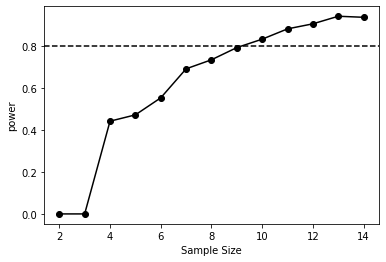

In [56]:
plt.plot(range(2,15), power, marker = 'o', color = 'k')
plt.axhline(y = 0.8, linestyle = '--', color = 'k')

plt.ylabel("power")
plt.xlabel('Sample Size')
plt.savefig(r"./SampleSizeAndStats/DelFreq-PowerAnalysis.png")

In [57]:
power

[0.0,
 0.0,
 0.441,
 0.471,
 0.552,
 0.69,
 0.733,
 0.791,
 0.831,
 0.88,
 0.904,
 0.94,
 0.935]

In [84]:
SSeffect = float(table.loc['Groups', 'SS'])
dfeffect = float(table.loc['Groups', 'df'])
MSerror = float(table.loc['Error', 'MS'])
SStotal = float(table.loc['Total', 'SS'])

# omega_sq = (SSeffect – (dfeffect*MSerror)) / MSerror + SStotal
d = MSerror + SStotal
n = dfeffect*MSerror

omega_sq = (SSeffect - n)/d
omega_sq

0.7452993362543503

In [99]:
import statsmodels.stats.power as power

In [121]:
power.FTestPower().power(omega_sq, 
                             table.loc['Groups', 'df'],
                             table.loc['Error', 'df'],
                             0.05, ncc = 25)

0.14754429870179753